## Image (Dog & Cat) Classification using Deep Neural Network

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/input/Project/PetImages"

CATEGORIES = ["Dog", "Cat"]

In [ ]:
!pip install tensorflow-gpu==2.0.0-beta1

### Importing the dataset 

In [0]:
import pickle
pickle_in = open("/input/Project/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/input/Project/y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


### Normalizing Images

In [0]:
import numpy as np
X_temp=X/255.0
y_temp=np.asarray(y)

### Spliting the dataset into train and test set

In [0]:
import sklearn.model_selection as sk
X_train, X_test, y_train, y_test = sk.train_test_split(X_temp, y_temp, test_size=0.25)

### Deep Neural Network Model Construction

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.BatchNormalization(axis=1),
                                    tf.keras.layers.Dense(100,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.BatchNormalization(axis=1),
                                    tf.keras.layers.Dense(100,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.4),
                                    tf.keras.layers.BatchNormalization(axis=1),
                                    tf.keras.layers.Dense(100,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.2),
                                    tf.keras.layers.BatchNormalization(axis=1),
                                    tf.keras.layers.Dense(100,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.7),
                                    tf.keras.layers.BatchNormalization(axis=1),
                                    tf.keras.layers.Dense(2,activation=tf.nn.sigmoid)])

### Model  parameter intialization

In [0]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "mean_squared_error", optimizer = opt, metrics=['accuracy'])

### Method for Early Stopping

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.01):
      print("\nReached 3% loss so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

## Training the  Deep Neural Network  model on the Training Image set

In [0]:
model.fit(X_train, y_train, batch_size=50,epochs=205,callbacks=[callbacks])

W0817 23:20:03.860084 140527287494528 nn_ops.py:4220] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 18709 samples
Epoch 1/205
18709/18709 [==============================] - 6s 296us/sample - loss: 0.3172 - accuracy: 0.4869
Epoch 2/205
18709/18709 [==============================] - 4s 227us/sample - loss: 0.3091 - accuracy: 0.4921
Epoch 3/205
18709/18709 [==============================] - 4s 237us/sample - loss: 0.3012 - accuracy: 0.4944
Epoch 4/205
18709/18709 [==============================] - 4s 224us/sample - loss: 0.2950 - accuracy: 0.4962
Epoch 5/205
18709/18709 [==============================] - 4s 228us/sample - loss: 0.2899 - accuracy: 0.4976
Epoch 6/205
18709/18709 [==============================] - 4s 230us/sample - loss: 0.2817 - accuracy: 0.4989
Epoch 7/205
18709/18709 [==============================] - 4s 231us/sample - loss: 0.2761 - accuracy: 0.4972
Epoch 8/205
18709/18709 [==============================] - 4s 232us/sample - loss: 0.2724 - accuracy: 0.4980
Epoch 9/205
18709/18709 [==============================] - 4s 232us/sample - loss: 0.2664 - accuracy: 0.4

### Saving the trained Model

In [0]:
tf.saved_model.save(model, "/input/Project/ImgClassiferTrainedModel_softmax")

W0817 23:35:46.438964 140527287494528 nn_ops.py:4220] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


### Model Evaluation on Test Image set

In [0]:
model.evaluate(X_test, y_test)

6237/6237 [==============================] - 1s 186us/sample - loss: 0.2470 - accuracy: 0.9844


[0.2469567992575604, 0.98444766]

### Predicting the input Image

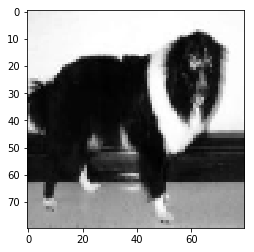

In [0]:
IMG_SIZE = 80
img_array = cv2.imread("/content/gdrive/My Drive/Project/PetImages/Dog/550.jpg" ,cv2.IMREAD_GRAYSCALE)  
#new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array/255.0, cmap='gray')
plt.show()

In [0]:
new_array=np.reshape(new_array,(80, 80, 1))
print(new_array.shape)
new_array=new_array.flatten()/255.0
print(new_array.shape)
new_array_2=np.reshape(new_array,(6400, 1))
print(new_array_2.shape)

(80, 80, 1)
(6400,)
(6400, 1)


In [0]:
class_prob=model.predict(new_array_2.T,batch_size=1)
print(class_prob)
classifications=model.predict_classes(new_array_2.T,batch_size=1)
print(classifications)
print(CATEGORIES[classifications[0]])


[[0.48928446 0.48928446]]
[0]
Dog
